In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df_old = pd.read_csv(r"without_date.csv")
df_old.head(5)

,Close/Last,Volume,Open,High,Low
0,$136.76,75693830,$137.35,$137.42,$135.86
1,$137.39,84183060,$136.30,$137.40,$134.59
2,$133.94,89880940,$135.76,$135.77,$133.61
3,$134.99,83305370,$135.73,$136.31,$134.61
4,$134.14,106239800,$133.75,$135.38,$130.93


 <h2 style="color:green"> lets modify our dataSet first

In [3]:
cl=[i[2:] for i in df_old[' Close/Last'].values]
op=[i[2:] for i in df_old[' Open'].values]
hi=[i[2:] for i in df_old[' High'].values]
lo=[i[2:] for i in df_old[' Low'].values]

# print(cl[:5])
# print(op[:5])
# print(hi[:5])
# print(lo[:5])
df_old=df_old.drop([' Close/Last', ' Open', ' High', ' Low'],axis=1) # we dont need these values.

df_old['Open']=op
df_old['High']=hi
df_old['Low']=lo
df_old['Close']=cl

df=df_old
df['Close']=pd.to_numeric(df['Close'],errors='coerce')

df['Open']=pd.to_numeric(df['Open'],errors='coerce')

df['High']=pd.to_numeric(df['High'],errors='coerce')

df['Low']=pd.to_numeric(df['Low'],errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    Volume  21 non-null     int64  
 1   Open     21 non-null     float64
 2   High     21 non-null     float64
 3   Low      21 non-null     float64
 4   Close    21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 968.0 bytes


In [4]:
df.head(5)

,Volume,Open,High,Low,Close
0,75693830,37.35,37.42,35.86,36.76
1,84183060,36.30,37.40,34.59,37.39
2,89880940,35.76,35.77,33.61,33.94
3,83305370,35.73,36.31,34.61,34.99
4,106239800,33.75,35.38,30.93,34.14


<h2 style="color:green"> In below graph x axis is just a numeric range

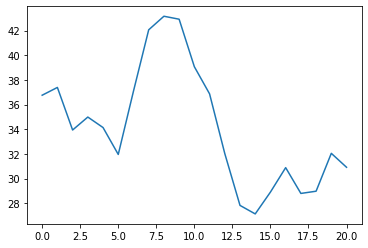

In [5]:
%matplotlib inline
df.Close.plot()

<h2 style="color:purple"> In the Above DataFrame we dont have Date column so with the help of DateRange functiion we can create a daterange.

In [6]:
#freq 'B'means business day
rng = pd.date_range(start="3/1/2020",end="3/30/2020",freq='B')

In [7]:
rng
# now i have all these days now

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30'],
              dtype='datetime64[ns]', freq='B')

In [17]:
df.set_index(rng,inplace=True)
df.head(5)

,Volume,Open,High,Low,Close
2020-03-02,75693830,37.35,37.42,35.86,36.76
2020-03-03,84183060,36.30,37.40,34.59,37.39
2020-03-04,89880940,35.76,35.77,33.61,33.94
2020-03-05,83305370,35.73,36.31,34.61,34.99
2020-03-06,106239800,33.75,35.38,30.93,34.14


<h2 style="color:green"> Now BELOW x axis would be A DATE INDEX

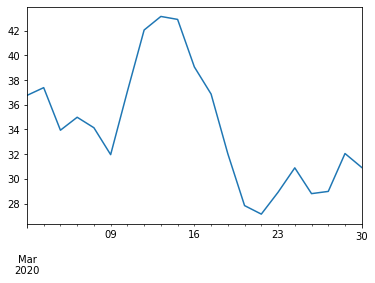

In [19]:
%matplotlib inline
df.Close.plot()

<h2 style="color:navy"> let say we dont know end date But we know how many date time index i want to generate / /

In [9]:
df.shape

(21, 5)

In [15]:
# periods = 21
rng2 = pd.date_range(start="1/1/2020",periods=21,freq='B')
rng2

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29'],
              dtype='datetime64[ns]', freq='B')

In [16]:
len(rng2)

21

<h2 style="color:navy"> Lets make a data set 

In [10]:
import numpy as np

In [18]:
# how to generate random numbers in a range
random_10=np.random.randint(1, 10, size=len(rng2))
random_100=np.random.randint(100,999,len(rng2))
random_1000=np.random.randint(1000,9999,len(rng2))

In [27]:
random_10

array([4, 2, 3, 6, 2, 8, 1, 8, 5, 7, 2, 5, 6, 8, 5, 1, 2, 3, 4, 6, 5])

In [23]:
len(random_100)

21

In [28]:
kuch_bhi = pd.DataFrame({"Date":rng2,
                        "random_10":random_10,
                        "random_100":random_100,
                        "random_1000":random_1000,})

In [29]:
kuch_bhi

,Date,random_10,random_100,random_1000
0,2020-01-01,4,821,5642
1,2020-01-02,2,149,2772
2,2020-01-03,3,159,2267
3,2020-01-06,6,483,5540
4,2020-01-07,2,405,4535
5,2020-01-08,8,775,9018
6,2020-01-09,1,949,5959
7,2020-01-10,8,358,8298
8,2020-01-13,5,960,8558
9,2020-01-14,7,802,2084
